In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pal = sns.color_palette()


In [3]:
train_data=pd.read_csv('/Users/pallavi385/Downloads/train-2.csv')
test_data=pd.read_csv('/Users/pallavi385/Downloads/test.csv')

In [4]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [24]:
train_data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [7]:
#counting various category questions
count=train_data['is_duplicate'].value_counts()
count

0    255027
1    149263
Name: is_duplicate, dtype: int64

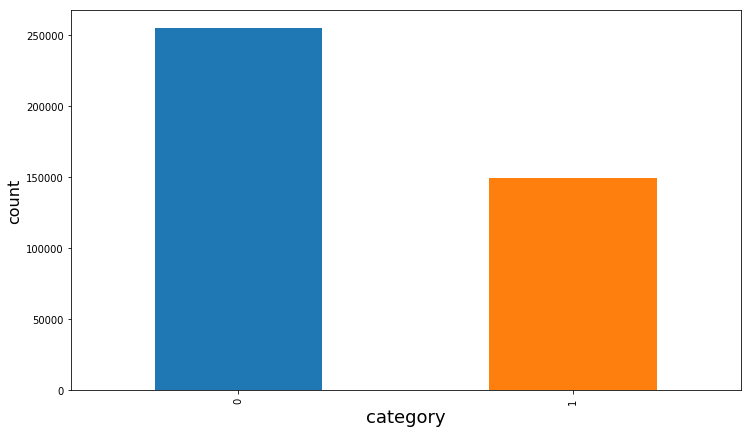

In [8]:
plt.figure(figsize=(12,7))
plt.xlabel('category', fontsize=18)
plt.ylabel('count', fontsize=16)
count.plot(kind="bar")

In [9]:
#mean value
mean_value= train_data['is_duplicate'].mean()

In [10]:
#means 36.91% pairs are duplicate pairs
mean_value

0.369197853026293

In [11]:
type(train_data['question1'])

pandas.core.series.Series

In [12]:
# 2 qids convert them to list 
twoqids = pd.Series(train_data['qid1'].tolist()+train_data['qid2'].tolist())

In [13]:
twoqids.head()


0    1
1    3
2    5
3    7
4    9
dtype: int64

In [14]:
print("quesn pairs in training data "+ str(len(train_data)))
print("questions in training data    "+ str(len(np.unique(twoqids))))
print('duplicate questions  {} '.format(np.sum(twoqids.value_counts() > 1)))

quesn pairs in training data 404290
questions in training data    537933
duplicate questions  111780 


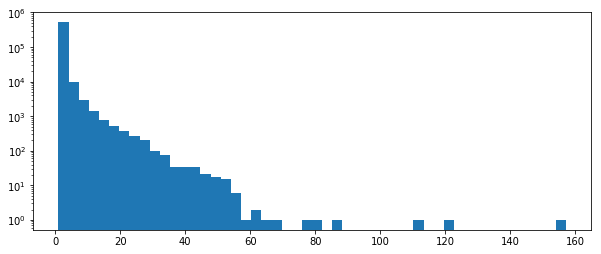

In [15]:
plt.figure(figsize=(10,4))
plt.hist(twoqids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')

In [16]:
training_quesns = pd.Series(train_data['question1'].tolist() +train_data['question2'].tolist()).astype(str)

In [17]:
len_quesn=training_quesns.apply(len)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00000000e+00, 0.00000000e+00, 5.77944801e-05, 0.00000000e+00,
        2.75211810e-05, 0.00000000e+00, 3.30254172e-05, 0.00000000e+00,
        3.85296534e-05, 0.00000000e+00, 4.67860077e-05, 0.00000000e+00,
        1.37605905e-05, 0.00000000e+00, 3.57775353e-05, 0.00000000e+00,
        2.47690629e-05, 0.00000000e+00, 2.47690629e-05, 0.00000000e+00,
        7.43071887e-05, 0.00000000e+00, 1.87144031e-04, 0.00000000e+00,
        7.40319769e-04, 0.00000000e+00, 1.07607818e-03, 0.00000000e+00,
        1.54944249e-03, 0.00000000e+00, 1.95675597e-03, 0.00000000e+00,
        2.89798036e-03, 0.00000000e+00, 3.70435096e-03, 0.00000000e+00,
        5.21251168e-03, 0.00000000e+00, 7.26559178e-03, 0.00000000e+00,
        7.70593068e-03, 0.00000000e+00, 9.84983068e-03, 0.00000000e+00,
        1.09892076e-02, 0.00000000e+00, 1.32046626e-02, 0.00000000e+00,
        1.56127660e-02, 0.00000000e+00, 1.72915580e-02, 0.00000000e+00,
        2.04179642e-02, 0.00000000e+00, 2.20967562e-02, 0.000000

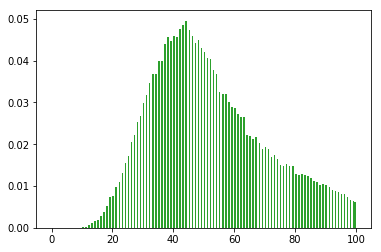

In [18]:
plt.hist(len_quesn, bins=200, range=[0, 100], color=pal[2], normed=True, label='train')

In [19]:
#word distribution
words=training_quesns.apply(lambda x:x.split(' '))

In [20]:
word_count=words.apply(len)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00000000e+00, 1.12547292e-04, 1.48414011e-04, 8.31860530e-03,
        2.47752455e-02, 4.69792183e-02, 7.75599252e-02, 1.06724515e-01,
        1.18934041e-01, 1.11049547e-01, 9.76873387e-02, 7.21638392e-02,
        5.81609773e-02, 4.51722777e-02, 3.95115200e-02, 3.28328895e-02,
        2.66984438e-02, 1.95040746e-02, 1.67002866e-02, 1.42564025e-02,
        1.23010479e-02, 1.02603553e-02, 8.92833953e-03, 7.54190531e-03,
        6.94824927e-03, 6.25317699e-03, 6.20494243e-03, 5.01144643e-03,
        4.13333020e-03, 2.68258324e-03, 2.17673882e-03, 1.60163453e-03,
        1.16628677e-03, 9.39955402e-04, 7.29702220e-04, 6.61679131e-04,
        5.99839960e-04, 5.83761776e-04, 5.36764006e-04, 4.77398401e-04,
        3.51246492e-04, 1.95411781e-04, 1.79333596e-04, 2.05306048e-04,
        1.47177227e-04, 1.64492195e-04, 1.34809393e-04, 1.18731209e-04,
        1.12547292e-04, 1.38519743e-04, 1.05126591e-04, 1.10073725e-04,
        1.00179457e-04, 9.52323236e-05, 9.02851899e-05, 8.410127

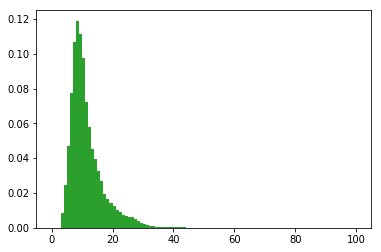

In [21]:
plt.hist(word_count, bins=100, range=[0, 100], color=pal[2], normed=True, label='train')

In [22]:
#most of the questions have words in range 15-20

(-0.5, 999.5, 999.5, -0.5)

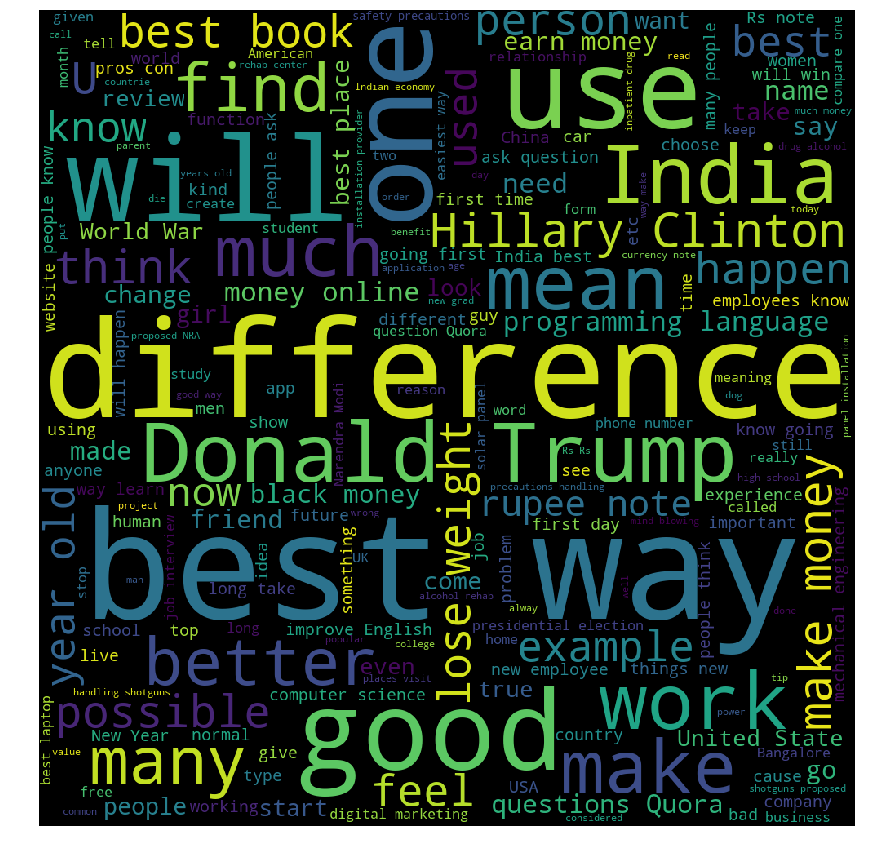

In [23]:
from wordcloud import WordCloud
cloud = WordCloud(width=1000, height=1000).generate(" ".join(training_quesns.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')